In [1]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Week_8_Q&A_dataset - Sheet1.csv")
data.head(10)

,Gender,Test preparation,Total Marks
0,male,none,14
1,female,none,28
2,female,none,18
3,female,none,48
4,female,none,21
5,female,completed,40
6,male,none,30
7,female,none,12
8,male,none,18
9,male,none,24


In [16]:
# To check the null values
data.isna().sum()

Gender              0
Test preparation    0
Total Marks         0
dtype: int64

# 1. Carry out descriptive analytics on the dataset.


In [3]:
data.describe()

,Total Marks
count,28.000000
mean,32.321429
std,12.454520
min,12.000000
25%,22.500000
50%,33.000000
75%,43.250000
max,50.000000


In [4]:
x = data[['Gender','Total Marks']].groupby('Gender').mean()
x

,Total Marks
Gender,
female,33.750000
male,30.416667


<AxesSubplot:xlabel='Gender'>

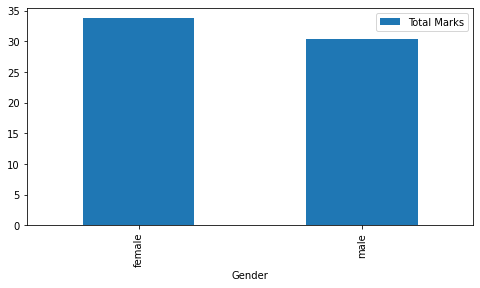

In [5]:
x.plot(kind = 'bar',figsize = (8,4))

In [6]:
#INSIGHTS

Female have higher marks than males.

<AxesSubplot:xlabel='Test preparation'>

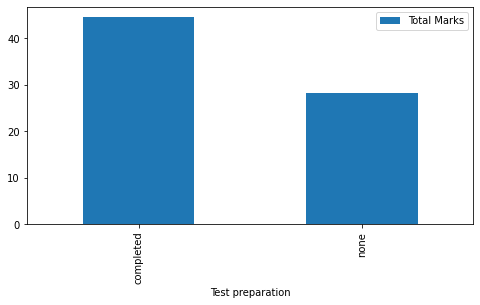

In [7]:
data[['Test preparation','Total Marks']].groupby('Test preparation').mean().plot(kind = 'bar',figsize = (8,4))


In [8]:
#INSIGHTS

Students who completed the Test preparation course have higher marks than those who haven't take the course.

# 2. Check whether female and male students scored the same marks.


In [9]:
# Here, we can use Two sampled t test.
# Set up the two hypothesis

    Ho : The marks of female and male students are same
    H1 : The marks of female and male students are not same

In [10]:
# Marks of female in the data
females_marks = data[data['Gender']=='female']
females_marks.head()

,Gender,Test preparation,Total Marks
1,female,none,28
2,female,none,18
3,female,none,48
4,female,none,21
5,female,completed,40


In [11]:
# Marks of males in the data
males_marks = data[data['Gender']=='male']
males_marks.head()

,Gender,Test preparation,Total Marks
0,male,none,14
6,male,none,30
8,male,none,18
9,male,none,24
10,male,completed,44


In [12]:
# Assigning the two samples into variables, a and b 
a = females_marks['Total Marks']
a
b = males_marks["Total Marks"]
b

0     14
6     30
8     18
9     24
10    44
11    23
12    43
13    28
18    47
19    36
20    14
21    44
Name: Total Marks, dtype: int64

In [13]:
from scipy import stats  # importing stats package

In [14]:
# Calculating t score using scipy
stats.ttest_ind(a,b)

Ttest_indResult(statistic=0.6940885268848668, pvalue=0.4937822317960763)

since p value = 0.4937822 > 0.05,we accept Ho.That means the marks scored by males and females students are same.

# 3. Whether test preparation helps the students

In [ ]:
# Here, we can use Two sampled t test.
# Set up the two hypothesis
 

     Ho :Test preparation doesn't helps students 
     H1 :Test preparation helps the students 

In [ ]:
# total marks of students who complete test preparation course
test_complete = data[data['Test preparation'] == 'completed']['Total Marks']
test_complete

In [ ]:
# Total marks of students whose test preparation is none
test_none = data[data['Test preparation'] == 'none']['Total Marks']
test_none


In [ ]:
# Calculating t score using scipy
stats.ttest_ind(test_complete,test_none)

Here, the pvalue = 0.0012 < 0.05, so we can reject Ho. That means we can accept the alternative H1,the test preparation helps the students.It effected in increasing student's marks.